In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.dtypes
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


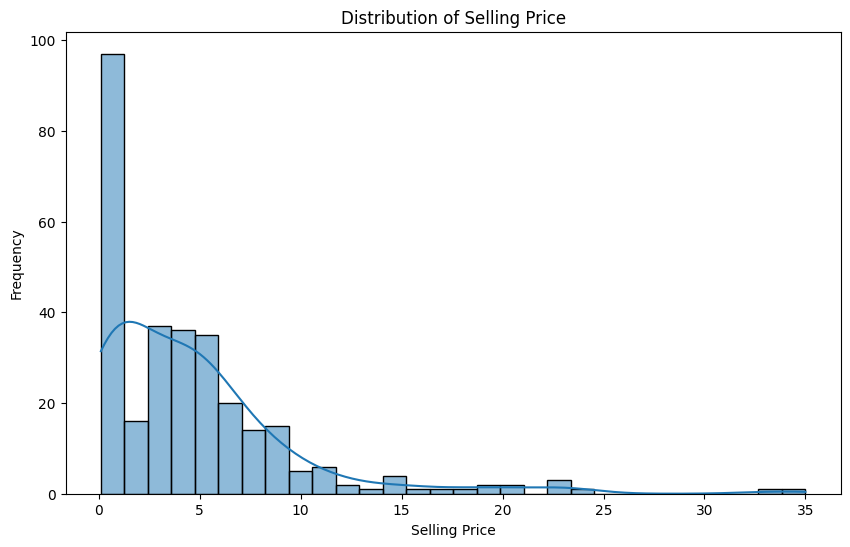

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

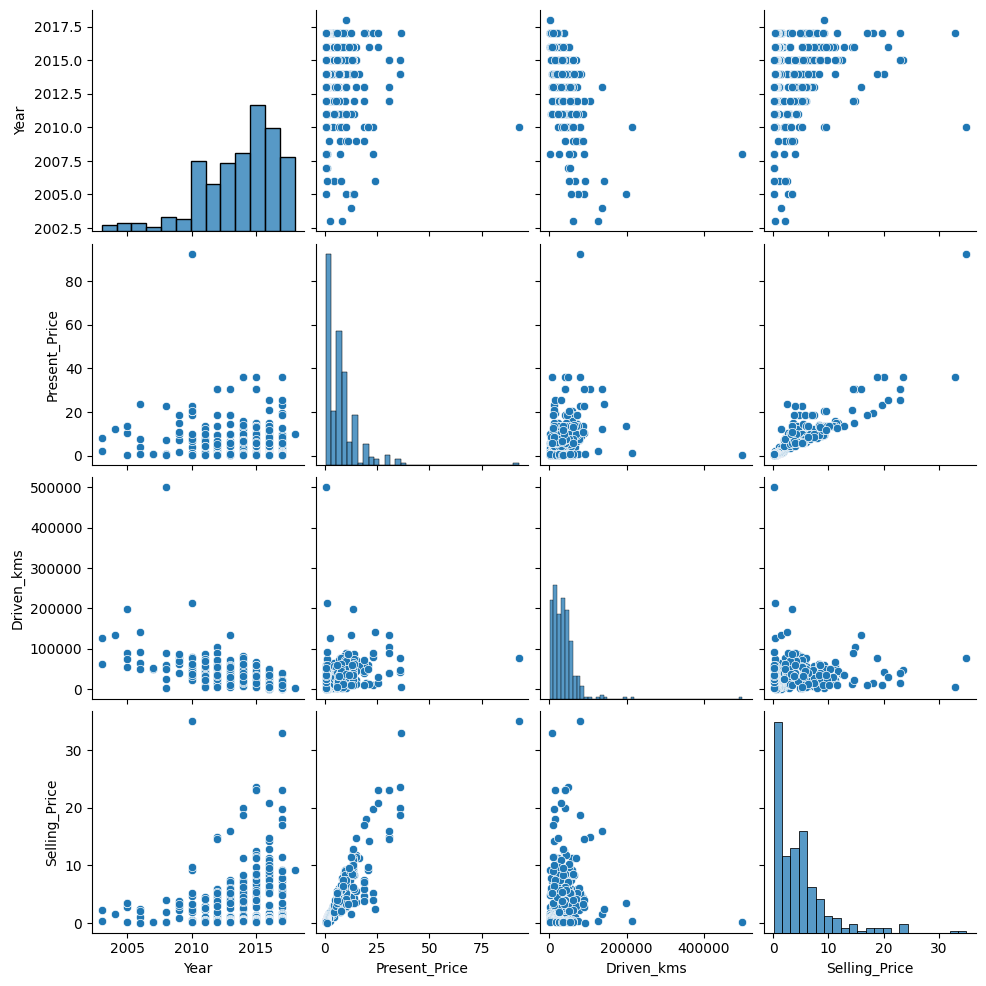

In [8]:
sns.pairplot(
    data,
    vars=['Year', 'Present_Price', 'Driven_kms', 'Selling_Price'],
    palette='Dark2'
)
plt.show()

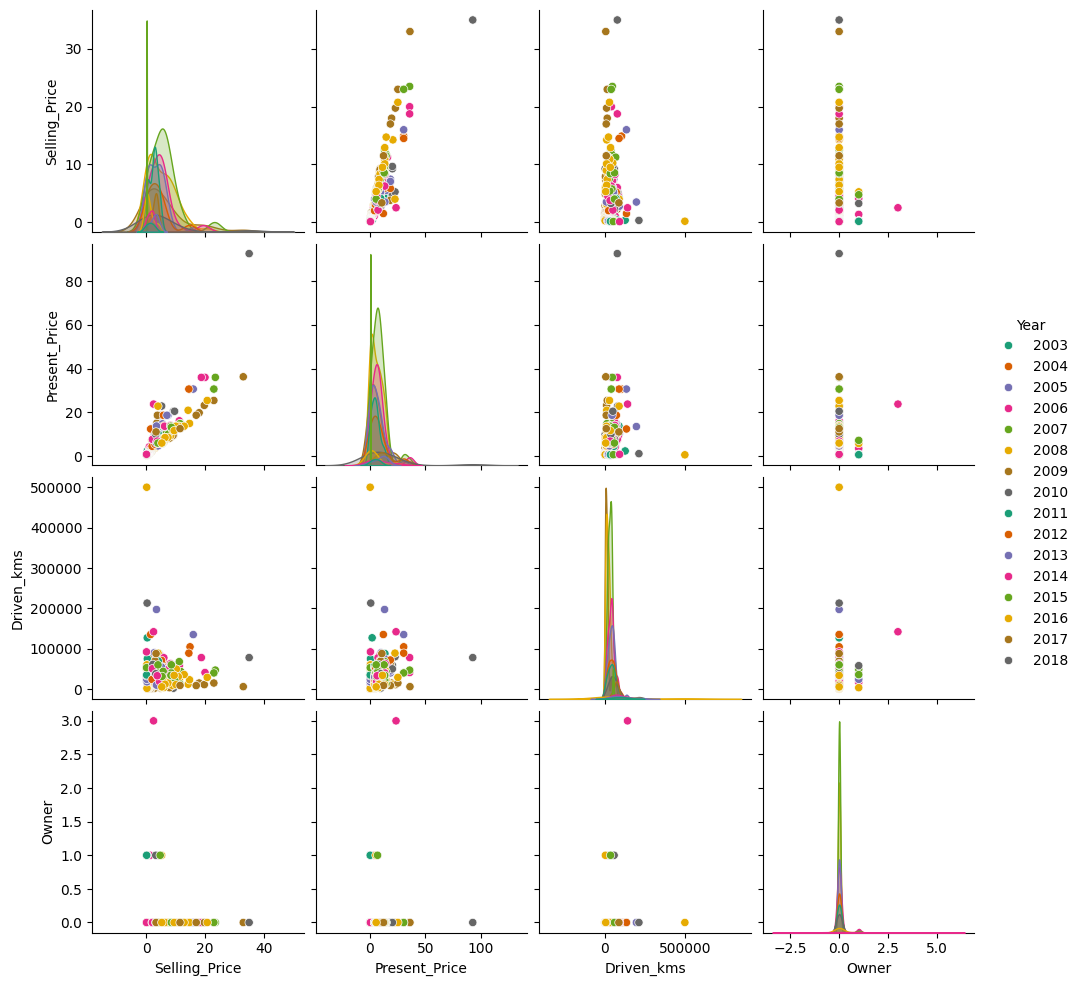

In [9]:
sns.pairplot(data, hue='Year', palette= 'Dark2')

In [10]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/car data.csv')

numeric_data = data.select_dtypes(include='number')

print(numeric_data.head())


   Year  Selling_Price  Present_Price  Driven_kms  Owner
0  2014           3.35           5.59       27000      0
1  2013           4.75           9.54       43000      0
2  2017           7.25           9.85        6900      0
3  2011           2.85           4.15        5200      0
4  2014           4.60           6.87       42450      0


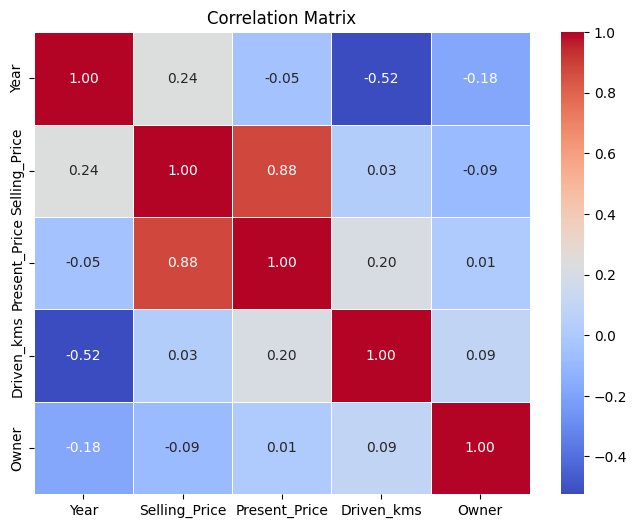

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(
    numeric_data.corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Matrix')
plt.show()


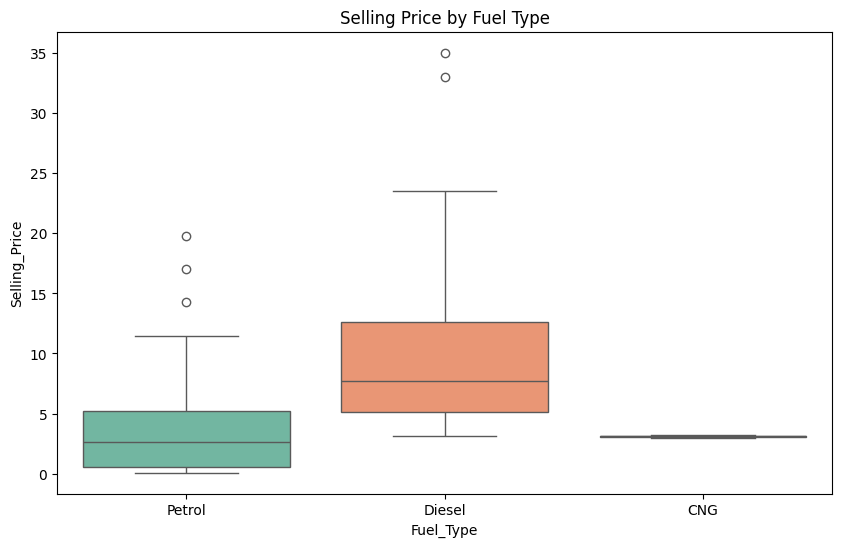

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Fuel_Type',
    y='Selling_Price',
    data=data,
    palette="Set2"   # <-- THIS MAKES BLUE + YELLOW
)
plt.title('Selling Price by Fuel Type')
plt.show()



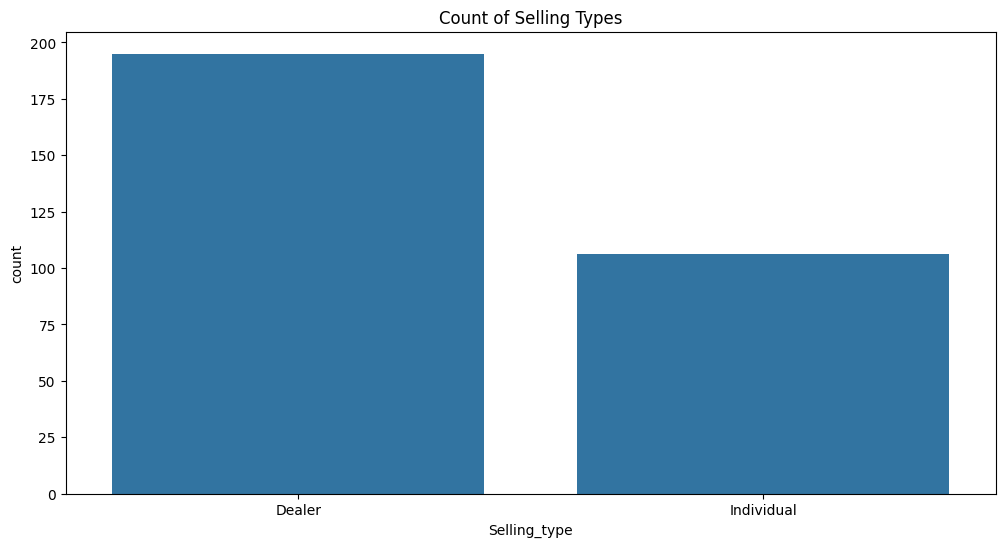

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Selling_type', data=data)
plt.title('Count of Selling Types')
plt.show()

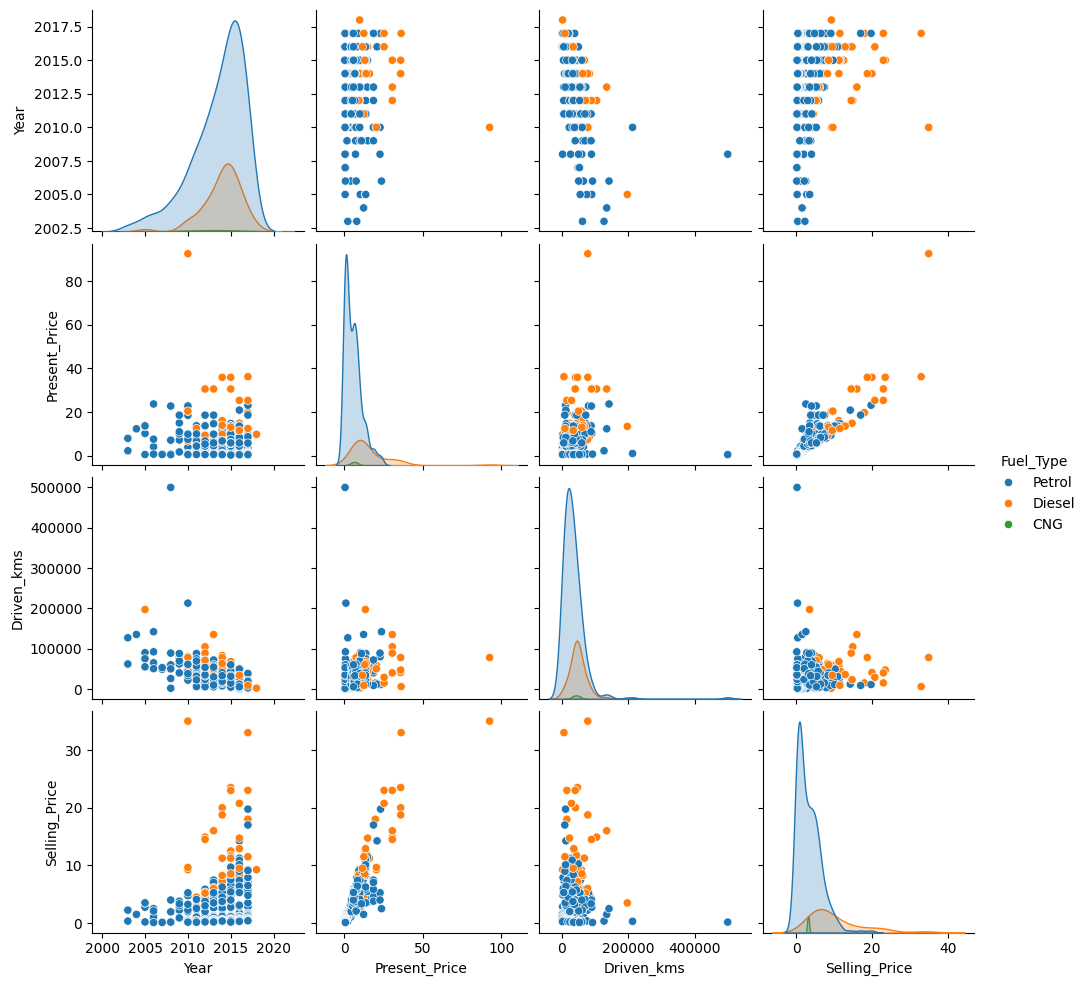

In [14]:
sns.pairplot(
    data,
    vars=['Year', 'Present_Price', 'Driven_kms', 'Selling_Price'],
    hue='Fuel_Type'
)
plt.show()

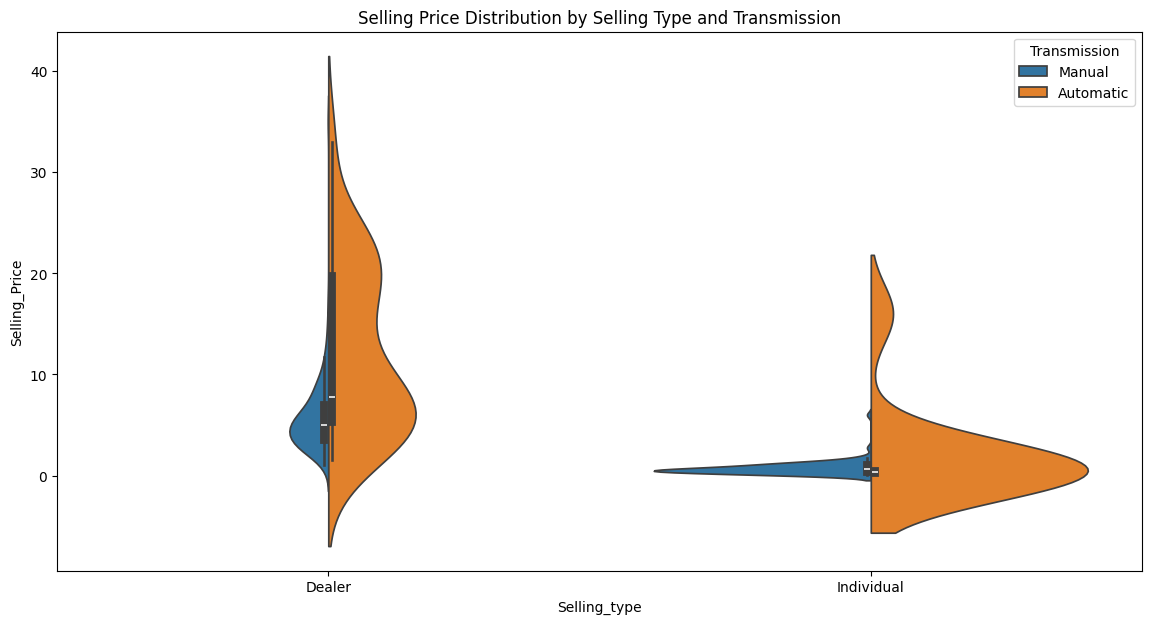

In [15]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Selling_type',y='Selling_Price',hue='Transmission',data=data,split=True)
plt.title('Selling Price Distribution by Selling Type and Transmission')
plt.show()

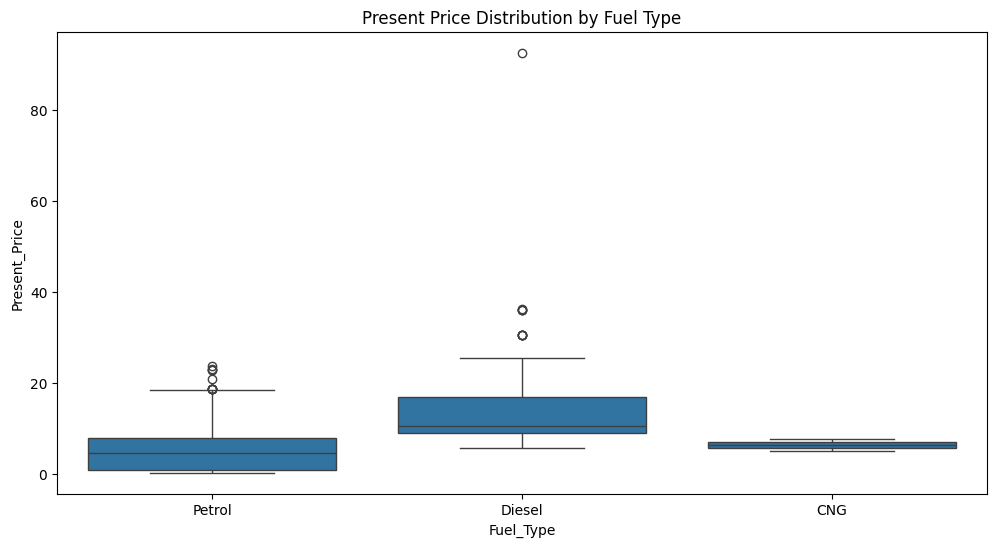

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Present_Price', data=data)
plt.title('Present Price Distribution by Fuel Type')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [18]:
features = ['Year', 'Present_Price', 'Driven_kms','Fuel_Type', 'Selling_type', 'Transmission']
target = 'Selling_Price'
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['Year', 'Present_Price', 'Driven_kms']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [19]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f'Mean Squared Error:", {mse}')
print(f'R-squared:",{r2}')


Mean Squared Error:", 0.8723871159016386
R-squared:",0.9621287180651648


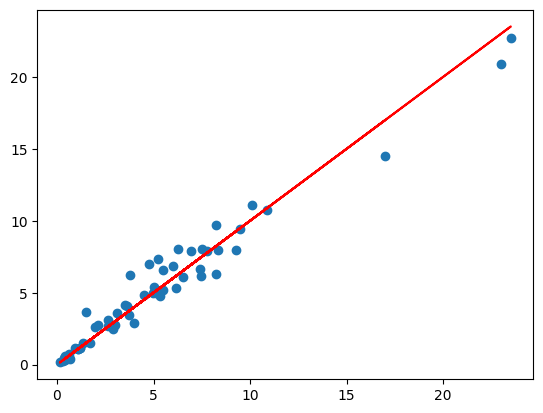

In [20]:
plt.scatter(y_test, y_pred)

plt.plot(y_test, y_test,'r')